In [1]:
import pandas as pd
import json 
from matplotlib import pyplot as plt 
from pandas.io.json import json_normalize
f=open('D:\machine learning\data-viz-challenge-master\data.json')
data=json.load(f)
f.close()
df= pd.json_normalize(data['data'])
df.to_csv('D:\machine learning\data-viz-challenge-master\data1.csv', sep=',',encoding='utf-8')

In [2]:
df.head(10)

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,40.189788,Lyons,CO,-105.355280,80540,NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,33.844371,Alpharetta,GA,-84.474050,30009,NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,42.446396,Westford,MA,-71.459405,01886,NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,44.624413,Saranac,NY,-73.809266,12981,NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,36.747083,Lampe,MO,-93.458626,65681,NaN
5,Fashion,View Project,F,45-54,married,d420e0e6927c4bebaa580e99b00e52e9,iOS,1393632064,41.472250,Cleveland,OH,-81.740305,44102,NaN
6,Games,View Project,F,35-44,single,0e00548eb6a54d2f8dbe2bdf6c8efb80,iOS,1393632137,40.719240,Middle Village,NY,-73.892791,11379,NaN
7,Technology,View Project,F,35-44,married,c6f18d84b43b4a4a90fa9a44016c3665,android,1393632138,37.103768,Los Banos,CA,-120.847479,93635,NaN
8,Fashion,View Project,F,45-54,married,2eb996fba97548b88f8ea5ec2484b34b,iOS,1393632145,41.040988,Rochester,IN,-86.254272,46975,NaN
9,Technology,View Project,F,45-54,married,e040fa23c3f84ad58ca59f1552fa3f0b,iOS,1393632159,40.203459,Newtown,IN,-87.147014,47969,NaN


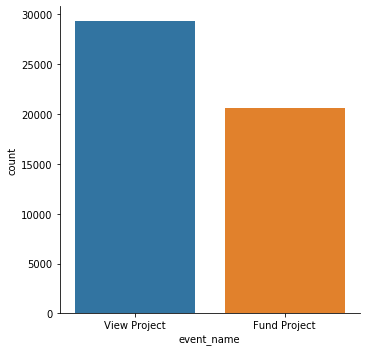

In [3]:
import seaborn as sns
sns.catplot(x="event_name", kind="count", data=df)

## As the people who have funded the project are more likely to fund for bicycle project, we are going to remove the people who have viewed the project

In [4]:
ind = df[(df['event_name']!='Fund Project')].index
df.drop(ind,inplace=True)

## People who are intrested in sports and Environment will be intrested in bicycle project. we will consider only the people who are intersted in sports and environment.

In [5]:
ind = df[(df['category']!='Sports')&(df['category']!='Environment')].index
df.drop(ind,inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location.latitude,location.city,location.state,location.longitude,location.zip_code,amount
0,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632200,40.189788,Lyons,CO,-105.355280,80540,31.0
1,Sports,Fund Project,M,18-24,married,be389e9be0e74398adcef3292ac409ee,android,1393632395,45.408374,Lake Oswego,OR,-122.691388,97034,40.0
2,Sports,Fund Project,F,18-24,single,71ca342ead4f4da180da4f9b4baaf760,android,1393633118,33.844371,Alpharetta,GA,-84.474050,30009,53.0
3,Sports,Fund Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,1393633458,33.794055,Atlanta,GA,-84.377326,30308,48.0
4,Sports,Fund Project,M,45-54,single,d23a964e8656403b853eb2a24139c408,android,1393633861,39.102704,Kansas City,MO,-94.595033,64105,27.0


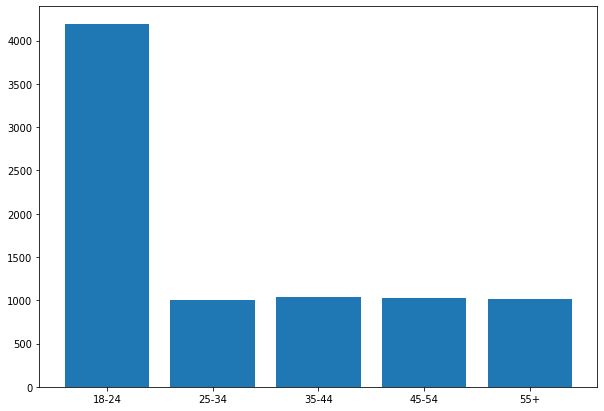

In [8]:
age = df.groupby('age')[['amount']].count()
fig = plt.figure(figsize =(10, 7)) 
plt.bar(age.index,age['amount'])  
plt.show()

## 18-24 age group people are likely to fund bicycle project

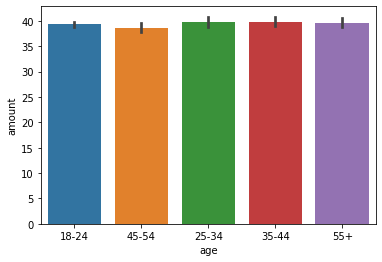

In [9]:
import seaborn as sns
sns.barplot(x="age",y="amount", data=df)

## the average amount paid by each age group is almost same

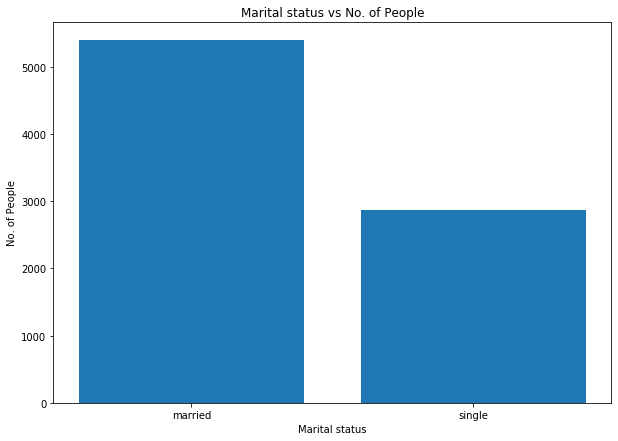

In [10]:
marital_status = df.groupby('marital_status')[['amount']].count()
fig = plt.figure(figsize =(10, 7)) 
plt.bar(marital_status.index,marital_status['amount']) 
plt.title("Marital status vs No. of People")
plt.xlabel("Marital status")
plt.ylabel("No. of People")
plt.show()

## People who are married are likely to fund for the project

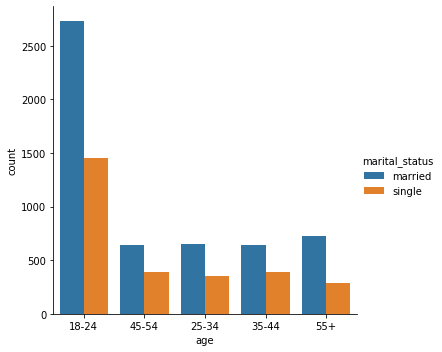

In [11]:
import seaborn as sns
sns.catplot(x="age", kind="count",hue="marital_status", data=df)

## So one must target the people whose age group is 18-24 and married

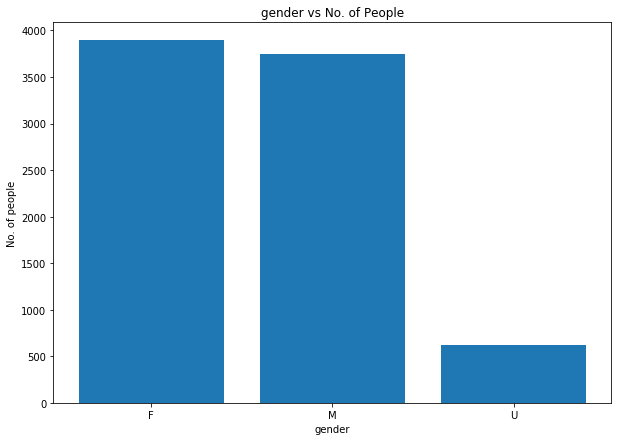

In [12]:
name = df.groupby('gender')[['amount']].count()
fig = plt.figure(figsize =(10, 7)) 
plt.xlabel("gender") 
plt.ylabel("No. of people")   
plt.title("gender vs No. of People")
plt.bar(name.index,name['amount'])  
plt.show()

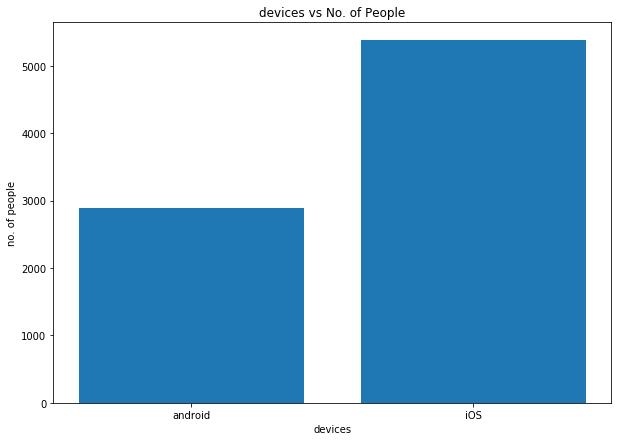

In [13]:
device = df.groupby('device')[['amount']].count()
fig = plt.figure(figsize =(10, 7)) 
plt.xlabel("devices") 
plt.ylabel("no. of people") 
plt.title("devices vs No. of People")
plt.bar(device.index,device['amount'])  
plt.show()

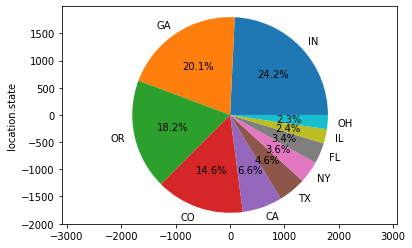

In [14]:
df['location.state'].value_counts().head(10).plot.pie(autopct='%1.1f%%',radius=1800,frame=True)
plt.axis('equal')
plt.show()

## Top 10 states that can fund for the bicycle project

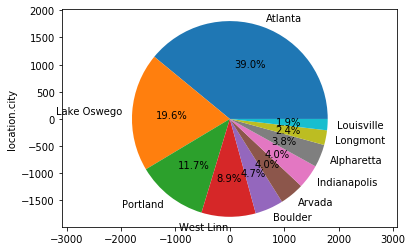

In [15]:
df['location.city'].value_counts().head(10).plot.pie(autopct='%1.1f%%',radius=1800,frame=True)
plt.axis('equal') 
plt.show()

## Top 10 cities that can fund for the bicycle project

# From the given visualization we can say that people who fall in age group 18 - 24 and are married and belong to states IN,GA, OR, CO and cities Atlanta, Lake Oswego, Portland and West Linn are likely to contribute for bicycle project